In [1]:
from tensorflow.python.keras.callbacks import EarlyStopping
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Concatenate, Input
from tensorflow.keras.utils import to_categorical

# Charger les données
file_path = "datas/ratings_filtered_vf.csv"  # Remplacez par le chemin réel de votre fichier
data = pd.read_csv(file_path)


Epoch 1/10


/Users/abiardolivry/PycharmProjects/IA_Project/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 500us/step - loss: 17548359761920.0000 - mae: 522811.6250 - val_loss: 11536868.0000 - val_mae: 2881.8428
Epoch 2/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 486us/step - loss: 79311306752.0000 - mae: 93842.4297 - val_loss: 57919208.0000 - val_mae: 7479.7402
Epoch 3/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 489us/step - loss: 37873659904.0000 - mae: 48451.2695 - val_loss: 42645.8281 - val_mae: 196.2677
Epoch 4/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 475us/step - loss: 2345901312.0000 - mae: 11542.1660 - val_loss: 14609.8340 - val_mae: 73.3297
Epoch 5/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 475us/step - loss: 327855712.0000 - mae: 2750.2756 - val_loss: 8584.8301 - val_mae: 52.6630
Epoch 6/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 473us/step - loss: 16299884.0000 - mae: 669.1055 - val_loss: 932.0230 - val_mae: 27.2157
Epoch 7/10
10000/10000 ━━━━━━━━━━━━━━━━━━━━ 5s 508us/step - loss: 356350.0938 - mae: 123.3537 - val_loss: 5.2654 - val_mae: 2.0926
Epoch 8/10
10000/10

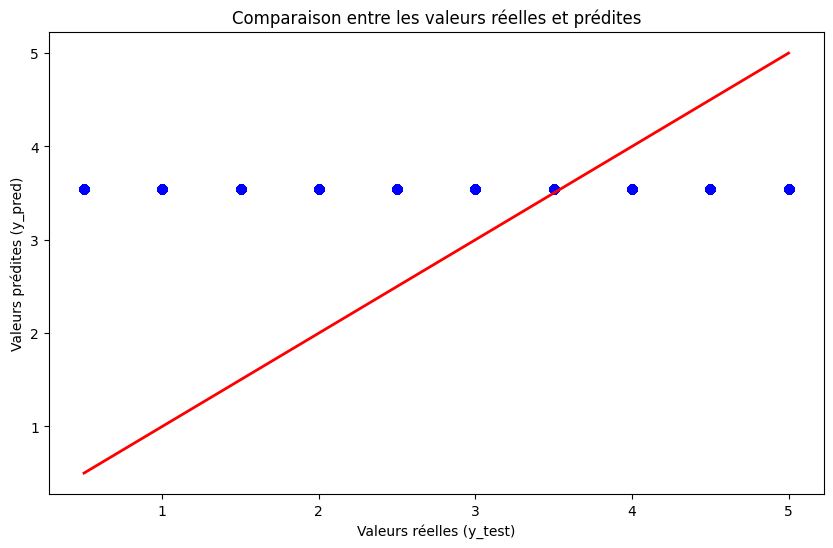

In [2]:
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt



# Limiter les données
data_cut = data.sample(n=500000, random_state=42)

# Encodage des colonnes catégoriques
#data_cut['title'] = data_cut['title'].astype('category').cat.codes  # Encodage des titres

# Normalisation des colonnes numériques
scaler = StandardScaler()
#data_cut[['timestamp', 'genre_rating', 'genres_encoded']] = scaler.fit_transform(
    #data_cut[['timestamp', 'genre_rating', 'genres_encoded']]
#)

# Séparation des données
X = data_cut[[ 'movieId', 'timestamp']]
y = data_cut['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèle de réseau de neurones
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
   # Dropout(0.5),
    Dense(32, activation='relu'),
    #Dropout(0.2),
    Dense(16, activation='relu'),
    #Dropout(0.1),
    Dense(1, activation='linear')  # Pour une régression, utilisez une sortie linéaire
])

# Callback pour l'arrêt anticipé
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,  # Arrête après 5 époques sans amélioration
    restore_best_weights=True
)

# Compilation du modèle
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Entraînement du modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Évaluation du modèle
loss, mae = model.evaluate(X_test, y_test, verbose=2)
print(f"Mean Absolute Error: {mae}")

# Prédictions
predictions = model.predict(X_test)

# Tracer la courbe entre les valeurs réelles et les prédictions
print(predictions)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, color='blue')  # Nuage de points
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Ligne d'égalité

plt.xlabel('Valeurs réelles (y_test)')
plt.ylabel('Valeurs prédites (y_pred)')
plt.title('Comparaison entre les valeurs réelles et prédites')
plt.show()
